<B>Libraries for Analysis

In [27]:
import pandas as pd
import numpy as np

import scipy
from scipy.stats import spearmanr

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style


<B> Reading the csv and data view

In [28]:
data = pd.read_csv(r'/Users/balajir/Documents/MSC/Sem 2/Business Data Mining/Assignment/Titanic.csv')
data


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,dest
0,1,1,"Allen, Miss. Elisabeth Walton",F,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",M,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,0,1,"Allison, Miss. Helen Loraine",F,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,0,1,"Allison, Mr. Hudson Joshua Creighton",M,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Zabour, Miss. Hileni",F,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,0,3,"Zabour, Miss. Thamine",F,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,0,3,"Zakarian, Mr. Mapriededer",M,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,0,3,"Zakarian, Mr. Ortin",M,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


<b> understanding the number of nulls in each column

In [29]:
data.isnull().sum()

survived       0
pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
boat         823
body        1188
dest         564
dtype: int64

<b> Exploring data Types

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   int64  
 1   pclass    1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
 11  boat      486 non-null    object 
 12  body      121 non-null    float64
 13  dest      745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


<b> 5 point analysis

In [31]:
data.describe()

,survived,pclass,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,0.381971,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.486055,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<b> Data Analysis to understand the nulls

In [32]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
dest,564,43.1
age,263,20.1


<b> used for copying the columns headers

In [33]:
data.columns.values

array(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'dest'],
      dtype=object)

<b> Heatmap to represent nulls

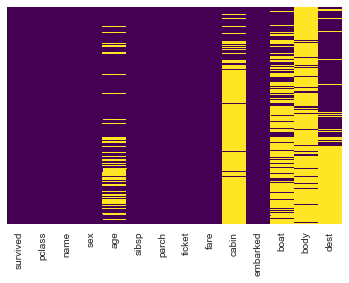

In [34]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig('heatmap3.png')


<b> Boxplot Analysis on Age and class

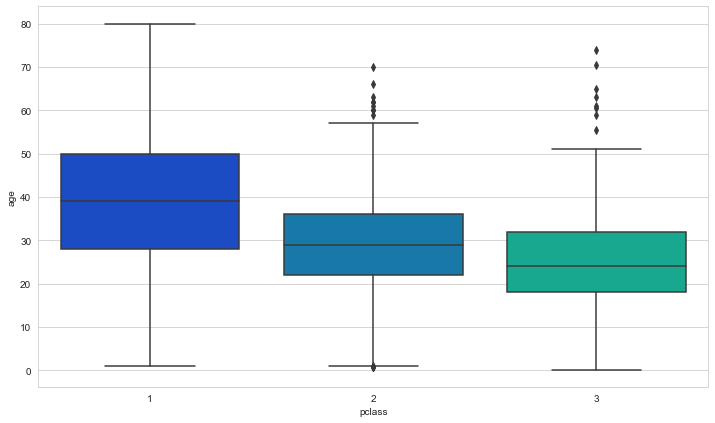

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(x='pclass',y='age',data=data,palette='winter')
plt.savefig('boxplot.png')


<b> Wrangling data- Age null treatment

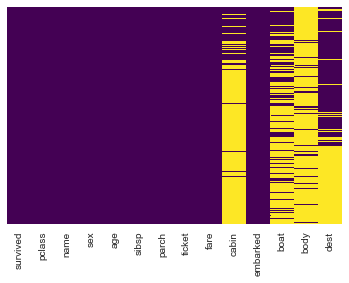

In [36]:
data.groupby(["pclass"])["age"].median()

def impute_age(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):

    if pclass == 1:
      return 39
      
    elif pclass == 2:
        return 29

    else:
        return 24

  else:
      return age

data['age'] = data[['age','pclass']].apply(impute_age,axis=1)

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig('heatmap2.png')

<b> Converting sex, embarkment, boat to binary and multiclass Binary

In [37]:
data.loc[data['sex'] == 'M', 'Gender_Binary'] = 1
data.loc[data['sex'] == 'F', 'Gender_Binary'] = 0
data.loc[data['embarked'] == 'S', 'embarked_Binary'] = 1
data.loc[data['embarked'] == 'C', 'embarked_Binary'] = 2
data.loc[data['embarked'] == 'Q', 'embarked_Binary'] = 3

data.loc[data.boat.isnull(),'boat_mod'] = 0
data.loc[data.boat.notnull(),'boat_mod'] = 1

data.loc[data.body.isnull(),'body_mod'] = 0
data.loc[data.body.notnull(),'body_mod'] = 1


data


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,dest,Gender_Binary,embarked_Binary,boat_mod,body_mod
0,1,1,"Allen, Miss. Elisabeth Walton",F,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0.0,1.0,1.0,0.0
1,1,1,"Allison, Master. Hudson Trevor",M,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1.0,1.0,1.0,0.0
2,0,1,"Allison, Miss. Helen Loraine",F,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.0,1.0,0.0,0.0
3,0,1,"Allison, Mr. Hudson Joshua Creighton",M,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1.0,1.0,0.0,1.0
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Zabour, Miss. Hileni",F,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0.0,2.0,0.0,1.0
1305,0,3,"Zabour, Miss. Thamine",F,24.0000,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0.0,2.0,0.0,0.0
1306,0,3,"Zakarian, Mr. Mapriededer",M,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1.0,2.0,0.0,1.0
1307,0,3,"Zakarian, Mr. Ortin",M,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1.0,2.0,0.0,0.0


<b> Graphical representation of survived

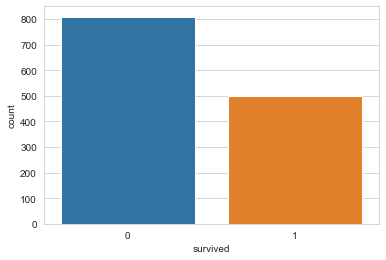

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=data)
plt.savefig('countplot1.png')

<b> Graphical representation of survivability per sex

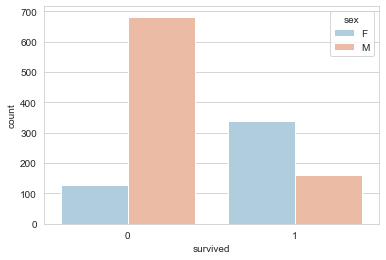

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=data,palette='RdBu_r')
plt.savefig('countplot2.png')


<b> Graphical representation of survived per class

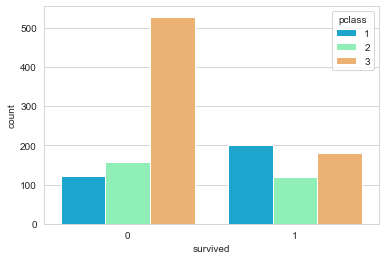

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=data,palette='rainbow')
plt.savefig('countplot3.png')

<b> Graphical representation of no.of siblings count

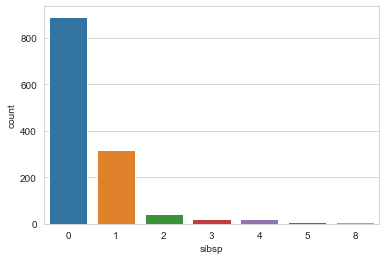

In [41]:
sns.countplot(x='sibsp',data=data)
plt.savefig('countplot4.png')


<B> Data wrangling- Dropping unwanted tables

In [42]:
data.drop('cabin',axis=1,inplace=True)

data.drop('dest',axis=1,inplace=True)

data.drop('ticket',axis=1,inplace=True)

data

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,boat,body,Gender_Binary,embarked_Binary,boat_mod,body_mod
0,1,1,"Allen, Miss. Elisabeth Walton",F,29.0000,0,0,211.3375,S,2,NaN,0.0,1.0,1.0,0.0
1,1,1,"Allison, Master. Hudson Trevor",M,0.9167,1,2,151.5500,S,11,NaN,1.0,1.0,1.0,0.0
2,0,1,"Allison, Miss. Helen Loraine",F,2.0000,1,2,151.5500,S,NaN,NaN,0.0,1.0,0.0,0.0
3,0,1,"Allison, Mr. Hudson Joshua Creighton",M,30.0000,1,2,151.5500,S,NaN,135.0,1.0,1.0,0.0,1.0
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,25.0000,1,2,151.5500,S,NaN,NaN,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Zabour, Miss. Hileni",F,14.5000,1,0,14.4542,C,NaN,328.0,0.0,2.0,0.0,1.0
1305,0,3,"Zabour, Miss. Thamine",F,24.0000,1,0,14.4542,C,NaN,NaN,0.0,2.0,0.0,0.0
1306,0,3,"Zakarian, Mr. Mapriededer",M,26.5000,0,0,7.2250,C,NaN,304.0,1.0,2.0,0.0,1.0
1307,0,3,"Zakarian, Mr. Ortin",M,27.0000,0,0,7.2250,C,NaN,NaN,1.0,2.0,0.0,0.0


<B> Another method for transforming into binary

In [43]:
""""""
# from sklearn.preprocessing import LabelEncoder
# le_sex = LabelEncoder()
# le_embarked = LabelEncoder()
# data['Gender_Binary'] = le_sex.fit_transform(data['sex'])
# data['job_n'] = le_embarked.fit_transform(data['embarked'])
# data
""""""

''

<b> Importing of sklearn libraries for x and Y variables

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
y = data.loc[:,'survived']
x = data.iloc[:,[1,5,6,7,8,9,10,11,12,13,14]]

<b> More Data wrangling after assigning x and Y variables

In [45]:
x.embarked_Binary.mode()

0    1.0
dtype: float64

In [46]:
data.info()
x.info()
if 'embarked' in x.columns: del x['embarked']
if 'boat' in x.columns: del x['boat']
if 'body' in x.columns: del x['body']

x.loc[x.embarked_Binary.isnull(), 'embarked_Binary'] = 1
x.loc[x.fare.isnull(), 'fare'] = data.fare.median()

x.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   survived         1309 non-null   int64  
 1   pclass           1309 non-null   int64  
 2   name             1309 non-null   object 
 3   sex              1309 non-null   object 
 4   age              1309 non-null   float64
 5   sibsp            1309 non-null   int64  
 6   parch            1309 non-null   int64  
 7   fare             1308 non-null   float64
 8   embarked         1307 non-null   object 
 9   boat             486 non-null    object 
 10  body             121 non-null    float64
 11  Gender_Binary    1309 non-null   float64
 12  embarked_Binary  1307 non-null   float64
 13  boat_mod         1309 non-null   float64
 14  body_mod         1309 non-null   float64
dtypes: float64(7), int64(4), object(4)
memory usage: 153.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeInde

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


pclass             0
sibsp              0
parch              0
fare               0
Gender_Binary      0
embarked_Binary    0
boat_mod           0
body_mod           0
dtype: int64

<b> Understanding X for Modeling

In [47]:
x.head()

,pclass,sibsp,parch,fare,Gender_Binary,embarked_Binary,boat_mod,body_mod
0,1,0,0,211.3375,0.0,1.0,1.0,0.0
1,1,1,2,151.5500,1.0,1.0,1.0,0.0
2,1,1,2,151.5500,0.0,1.0,0.0,0.0
3,1,1,2,151.5500,1.0,1.0,0.0,1.0
4,1,1,2,151.5500,0.0,1.0,0.0,0.0


<b> Splitting train and test data - set seed (100) random state

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=100)

X_train



,pclass,sibsp,parch,fare,Gender_Binary,embarked_Binary,boat_mod,body_mod
136,1,0,0,28.5000,1.0,2.0,1.0,0.0
490,2,0,0,10.5000,0.0,1.0,0.0,1.0
537,2,0,0,13.0000,1.0,1.0,0.0,0.0
1114,3,0,0,7.0000,1.0,1.0,0.0,0.0
840,3,0,0,8.8500,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
802,3,0,0,6.9500,1.0,3.0,0.0,0.0
53,1,0,0,47.1000,1.0,1.0,0.0,0.0
350,2,0,2,39.0000,0.0,1.0,1.0,0.0
79,1,2,0,25.7000,0.0,1.0,1.0,0.0


<b> Logistic Regression

In [49]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

<b> Logistic Prediction and score

In [50]:
y_pred= lr.predict(X_test)

lr.score(X_test,y_test)

0.9847328244274809

<b> Logistic regression Confusion Matrix

In [51]:
confusion_matrix(y_test,y_pred)

array([[250,   3],
       [  3, 137]])

<b> Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

<b> Naive Bayes Score

In [53]:
nb.score (X_test,y_test)

0.9745547073791349

<B> Naive Bayes Confusion Matrix and prediction

In [54]:
y_pred1 = nb.predict (X_test) 
confusion_matrix(y_test,y_pred1)

array([[246,   7],
       [  3, 137]])

<b> KNN Prediction and score

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred2 = knn.predict (X_test)

knn.score (X_test,y_test)

0.916030534351145

<b> KNN Confusion Matrix

In [56]:
confusion_matrix(y_test,y_pred2)

array([[230,  23],
       [ 10, 130]])

<b> Decision Tree Prediction and score

In [57]:
from sklearn import tree

dt= tree.DecisionTreeClassifier()

dt.fit(X_train,y_train)

dt.score(X_test,y_test)

0.9745547073791349

In [58]:
y_pred3 = dt.predict (X_test)

<b> Decision Tree Confusion Matrix

In [59]:
confusion_matrix(y_test,y_pred3)

array([[249,   4],
       [  6, 134]])

<b> Cross validation 10 fold Linear regression

In [60]:
from sklearn.model_selection import cross_val_score
    
scores = cross_val_score(lr, X_train, y_train, cv=10)
print("Mean:", scores.mean())
scores

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean: 0.9716196846631628


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.95652174, 0.95652174, 0.9673913 , 0.9673913 , 0.97826087,
       1.        , 0.94505495, 0.96703297, 0.98901099, 0.98901099])

<b> Cross validation 10 fold Naive Bayes

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_train, y_train, cv=10)
print("Mean:", scores.mean())
scores

Mean: 0.9629001433349259


array([0.95652174, 0.95652174, 0.93478261, 0.95652174, 0.95652174,
       1.        , 0.94505495, 0.96703297, 0.97802198, 0.97802198])

<b> Cross validation 10 fold KNN

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=10)
print("Mean:", scores.mean())
scores

Mean: 0.8788819875776397


array([0.88043478, 0.80434783, 0.84782609, 0.93478261, 0.85869565,
       0.89130435, 0.91208791, 0.91208791, 0.9010989 , 0.84615385])

<b> Cross validation 10 fold Decision Tree

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_train, y_train, cv=10)
print("Mean:", scores.mean())
scores

Mean: 0.9628881987577639


array([0.93478261, 0.93478261, 0.9673913 , 0.97826087, 0.97826087,
       0.97826087, 0.93406593, 0.96703297, 0.97802198, 0.97802198])

<b>ROC Curve modeling

In [64]:
r_probs = [0 for _ in range(len(y_test))]
nb_probs = nb.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

In [65]:
nb_probs= nb_probs[:,1]
lr_probs = lr_probs[:,1]
knn_probs = knn_probs[:,1]
dt_probs = dt_probs[:,1]

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve

r_auc = roc_auc_score(y_test,r_probs)
nb_auc = roc_auc_score(y_test,nb_probs)
lr_auc = roc_auc_score(y_test,lr_probs)
knn_auc = roc_auc_score(y_test,knn_probs)
dt_auc = roc_auc_score(y_test,dt_probs)


In [67]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

<b> Plotting ROC curve

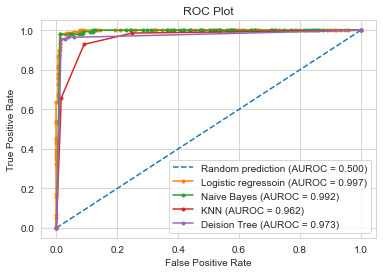

In [68]:
import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker ='.', label='Logistic regressoin (AUROC = %0.3f)' % lr_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Deision Tree (AUROC = %0.3f)' % dt_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()


<b> Best model validation with scores 

In [69]:
models = pd.DataFrame({
    'Model': ['Decision Tree','LogisticRegression','K-Nearest Neighbours', 'Naive Bayes'],
    'Score': [dt.score(X_test,y_test),lr.score(X_test,y_test),knn.score(X_test,y_test),nb.score(X_test,y_test)]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,LogisticRegression,0.984733
0,Decision Tree,0.974555
3,Naive Bayes,0.974555
2,K-Nearest Neighbours,0.916031


<b> Logistic Regression Feature importance

In [70]:
features=pd.get_dummies(x,drop_first=True)
features['age']=data['age']
 
lr.fit(features,data['survived'])
 
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[abs(i) for i in lr.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,feature,feature_importance
6,boat_mod,6.494242
4,Gender_Binary,2.541761
7,body_mod,1.073472
0,pclass,0.577980
2,parch,0.260199
5,embarked_Binary,0.240885
1,sibsp,0.192420
8,age,0.020273
3,fare,0.000598


<b> Decision tree Feature importance

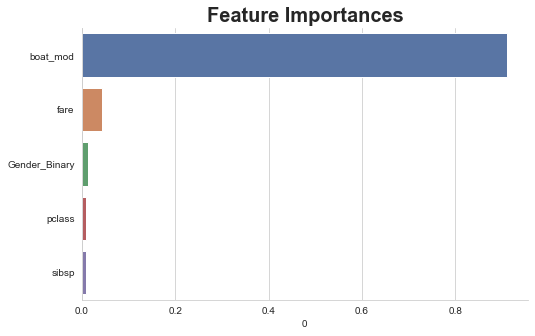

In [71]:

importances = pd.DataFrame(dt.feature_importances_, index = X_train.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)
importances = importances.iloc[0:5,:] 

plt.figure(figsize=(8, 5)) 
sns.barplot(x=0, y=importances.index, data=importances,palette="deep").set_title("Feature Importances",
                                                                                 fontdict= { 'fontsize': 20,
                                                                                            'fontweight':'bold'});
sns.despine()

<b> Naive Bayes feature Importance

In [72]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(nb, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
col_names = X_train.columns.values
NB_Imp = pd.DataFrame({'Variable':col_names,'importance': importances, 'index': indices}, columns=['Variable','importance'])
NB_Imp_sort = NB_Imp.sort_values(by = 'importance',ascending = False, ignore_index=True)
NB_Imp_sort

,Variable,importance
0,boat_mod,0.357252
1,body_mod,0.031043
2,fare,0.016794
3,Gender_Binary,0.003053
4,pclass,0.000000
5,parch,0.000000
6,embarked_Binary,0.000000
7,sibsp,-0.000509


<b> KNN Feature importance module

In [73]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(knn, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
col_names = X_train.columns.values
knn_Imp = pd.DataFrame({'Variable':col_names,'importance': importances, 'index': indices}, columns=['Variable','importance'])
knn_Imp_sort = knn_Imp.sort_values(by = 'importance',ascending = False, ignore_index=True)
knn_Imp_sort

,Variable,importance
0,boat_mod,0.243257
1,fare,0.074300
2,sibsp,0.035623
3,Gender_Binary,0.022392
4,pclass,0.019338
5,parch,0.012214
6,body_mod,0.001527
7,embarked_Binary,-0.004071
